## Simple Linear Regression

In this example, a single feature is used to run a linear regression. We will use BMI data extracted from Gapminder to estimate life expectancy.

In [1]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Make a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(21.07931)

print(laos_life_exp)

[[ 60.31564716]]


## Multiple Linear Regression

Now we will use a sample dataset from scikit-learn with Boston house prices data. The 'x' variable contains 13 different features that will be used to estimate prices.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

print(prediction)

[ 23.68420569]


## Polynomial Regression

In this case, we use the `PolynomialFeatures` to generate a feature matrix of the input data set.
Also, we can make use of `sklearn.pipeline` in order to merge multiple preprocessing steps.

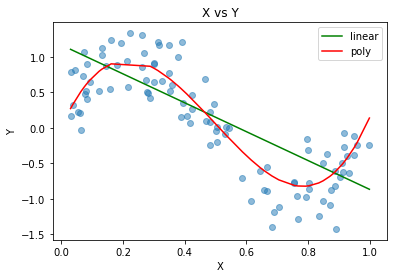

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, cross_validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
    return np.sin(2 * np.pi * x)

x = np.random.uniform(0, 1, size=100)[:, np.newaxis]
y = f(x) + np.random.normal(scale=0.3, size=100)[:, np.newaxis]

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.5, random_state=0)


poly_model = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())
poly_model.fit(x_train, y_train)


linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(x_train, y_train)

fig = plt.figure()
ax = plt.axes()
x_test.sort(axis=0)
ax.set(xlabel='X', ylabel='Y', title='X vs Y')
ax.scatter(x,y, alpha=0.5, cmap='viridis')
ax.plot(x_test, linear_model_1.predict(x_test), color='green', label='linear')
ax.plot(x_test, poly_model.predict(x_test), color='red', label='poly')

ax.legend()

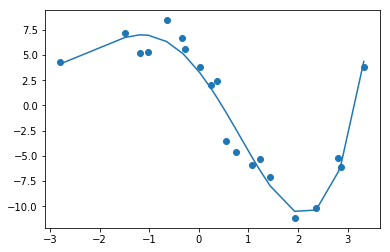

In [2]:
# TODO: Add import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

%matplotlib inline

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data_polynomial.csv')
X = train_data['Var_X'].values.reshape(-1,1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature

poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features

# poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

# In this case, poly_model requires a matrix of n columns, where n is the number of 
# polynomial features that is returned from using transform.

# http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

poly_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
poly_model.fit(X, y)

plt.figure()
plt.scatter(X, y)
X.sort(axis=0)
plt.plot(X,poly_model.predict(X))


## Regularization

Sklearn's `Lasso` tool will be used to perform regularization to our linear regression models.

In [48]:
# TODO: Add import statements
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data_regularization.csv')
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X,y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[ 0.          2.33659619  2.0140086  -0.05753445 -3.91583673  0.        ]


## Feature Scaling

### Standardization

```python
df["height_standard"] = (df["height"] - df["height"].mean()) / df["height"].std()
```

### Normalization

```python
df["height_normal"] = (df["height"] - df["height"].min()) / (df["height"].max() - df['height'].min())
```

We can use the `StandardScaler` in scikit-learn to add an intermediate step for Standardization:

In [49]:
# TODO: Add import statements
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data_regularization.csv')
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.8596924    9.05021225  -0.         -11.72692976
   0.41040086]
